![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

filename_features = r"C:\Users\cepir\Documents\Henrique\EBAC\features.txt"
filename_labels = r"C:\Users\cepir\Documents\Henrique\EBAC\activity_labels.txt"

filename_subtrain = r"C:\Users\cepir\Documents\Henrique\EBAC\subject_train.txt"
filename_xtrain = r"C:\Users\cepir\Documents\Henrique\EBAC\X_train.txt"
filename_ytrain = r"C:\Users\cepir\Documents\Henrique\EBAC\y_train.txt"

filename_subtest = r"C:\Users\cepir\Documents\Henrique\EBAC\subject_test.txt"
filename_xtest = r"C:\Users\cepir\Documents\Henrique\EBAC\X_test.txt"
filename_ytest = r"C:\Users\cepir\Documents\Henrique\EBAC\y_test.txt"

# Carrega os nomes das features
features = pd.read_csv(filename_features, header=None, names=['cod_label', 'nome_var'], sep="#")
labels = pd.read_csv(filename_labels, sep="\s+", header=None, names=['cod_label', 'label'])

# Corrigido: usa apenas a coluna com os nomes das variáveis
feature_names = features['nome_var'].tolist()

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'])
X_train = pd.read_csv(filename_xtrain, sep="\s+", header=None, names=feature_names)
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'])
X_test = pd.read_csv(filename_xtest, sep="\s+", header=None, names=feature_names)
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [2]:
%%time
clf = DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Acurácia - Treinamento: {acc_train:.4f}")
print(f"Acurácia - Teste: {acc_test:.4f}")

Acurácia - Treinamento: 0.9758
Acurácia - Teste: 0.8799
CPU times: total: 9.42 s
Wall time: 10.6 s


## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [3]:
%%time
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf_pca = DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)
clf_pca.fit(X_train_pca, y_train)

y_pred_train_pca = clf_pca.predict(X_train_pca)
y_pred_test_pca = clf_pca.predict(X_test_pca)

acc_train_pca = accuracy_score(y_train, y_pred_train_pca)
acc_test_pca = accuracy_score(y_test, y_pred_test_pca)

print(f"Acurácia - Treinamento: {acc_train_pca:.4f}")
print(f"Acurácia - Teste: {acc_test_pca:.4f}")

Acurácia - Treinamento: 0.4997
Acurácia - Teste: 0.4571
CPU times: total: 938 ms
Wall time: 667 ms


## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


In [4]:
%%time
componentes = [1, 2, 5, 10, 50]
resultados = []

for n in componentes:
   
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    clf = DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)
    clf.fit(X_train_pca, y_train)
    
    y_pred_train = clf.predict(X_train_pca)
    y_pred_test = clf.predict(X_test_pca)
    
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
  
    
    resultados.append({
        'n_componentes': n,
        'acuracia_treino': acc_train,
        'acuracia_teste': acc_test,
})

resultados_df = pd.DataFrame(resultados)
display(resultados_df)

,n_componentes,acuracia_treino,acuracia_teste
0,1,0.499728,0.457075
1,2,0.612758,0.584662
2,5,0.846028,0.788599
3,10,0.892682,0.824228
4,50,0.919342,0.822871


CPU times: total: 5.89 s
Wall time: 3.57 s


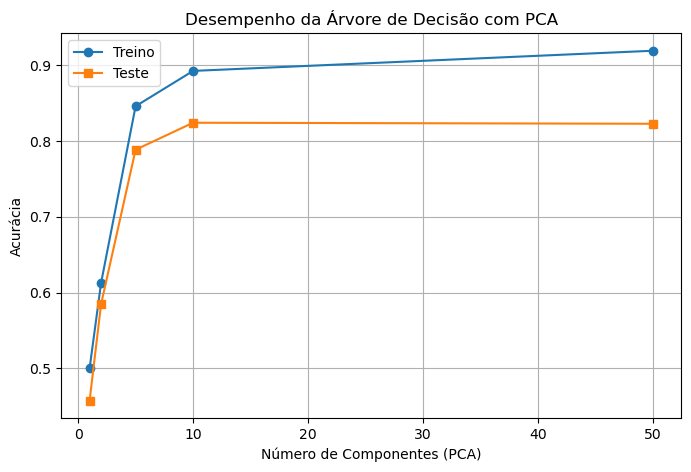

In [5]:
plt.figure(figsize=(8,5))
plt.plot(resultados_df['n_componentes'], resultados_df['acuracia_treino'], marker='o', label='Treino')
plt.plot(resultados_df['n_componentes'], resultados_df['acuracia_teste'], marker='s', label='Teste')
plt.xlabel('Número de Componentes (PCA)')
plt.ylabel('Acurácia')
plt.title('Desempenho da Árvore de Decisão com PCA')
plt.legend()
plt.grid(True)
plt.show()

## Conclua

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

A acurácia aumentou rapidamente até cerca de 5 a 10 componentes e depois se estabilizou. Ganhos adicionais foram mínimos, indicando que poucas componentes já capturam bem a informação dos dados. O tempo aumentou conforme o número de componentes cresceu, mas de forma moderada. Mais componentes exigem mais cálculos no PCA e na árvore.